In [1]:
import torchmetrics.functional as TF
from torch import Tensor, LongTensor
from typing import List
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F

In [2]:
from transformers.models.auto.tokenization_auto import AutoTokenizer
from data import WSDDataModule

In [3]:
from argparse import Namespace
from functools import partial

In [4]:
args = Namespace(
    **{
        "encoder_name": "roberta-base",
        "data_dir": "./data/",
        "batch_size": 64,
        "num_workers": 3,
        "task": "WSD",
    }
)

In [5]:
tokenizer = AutoTokenizer.from_pretrained(args.encoder_name, add_prefix_space=True)
tokenize_fn = partial(
    tokenizer,
    is_split_into_words=True,
    return_tensors="pt",
    padding=True,
)
wsd = WSDDataModule(
    args.task,
    tokenize_fn,
    args.data_dir,
    args.batch_size,
    args.num_workers,
)
wsd.prepare_data()
wsd.setup()

Dataset already downloaded.
Creating dataset for SemCor
Dataset already processed. Loading from disk
Creating dataset for semeval2007
Dataset already processed. Loading from disk
Creating dataset for semeval2013
Dataset already processed. Loading from disk
Creating dataset for semeval2015
Dataset already processed. Loading from disk
Creating dataset for senseval2
Dataset already processed. Loading from disk
Creating dataset for senseval3
Dataset already processed. Loading from disk
Creating dataset for SemCor
Dataset already processed. Loading from disk


In [6]:
wsd_df = wsd.semcor.to_pandas()

In [7]:
all_senses = np.array([x for y in wsd_df.senses for x in y])

In [8]:
import matplotlib.pyplot as plt

In [15]:
from collections import Counter, OrderedDict

In [10]:
counts = Counter(all_senses)

In [23]:
counts_df = pd.DataFrame.from_dict(counts, orient="index", columns=["count"])

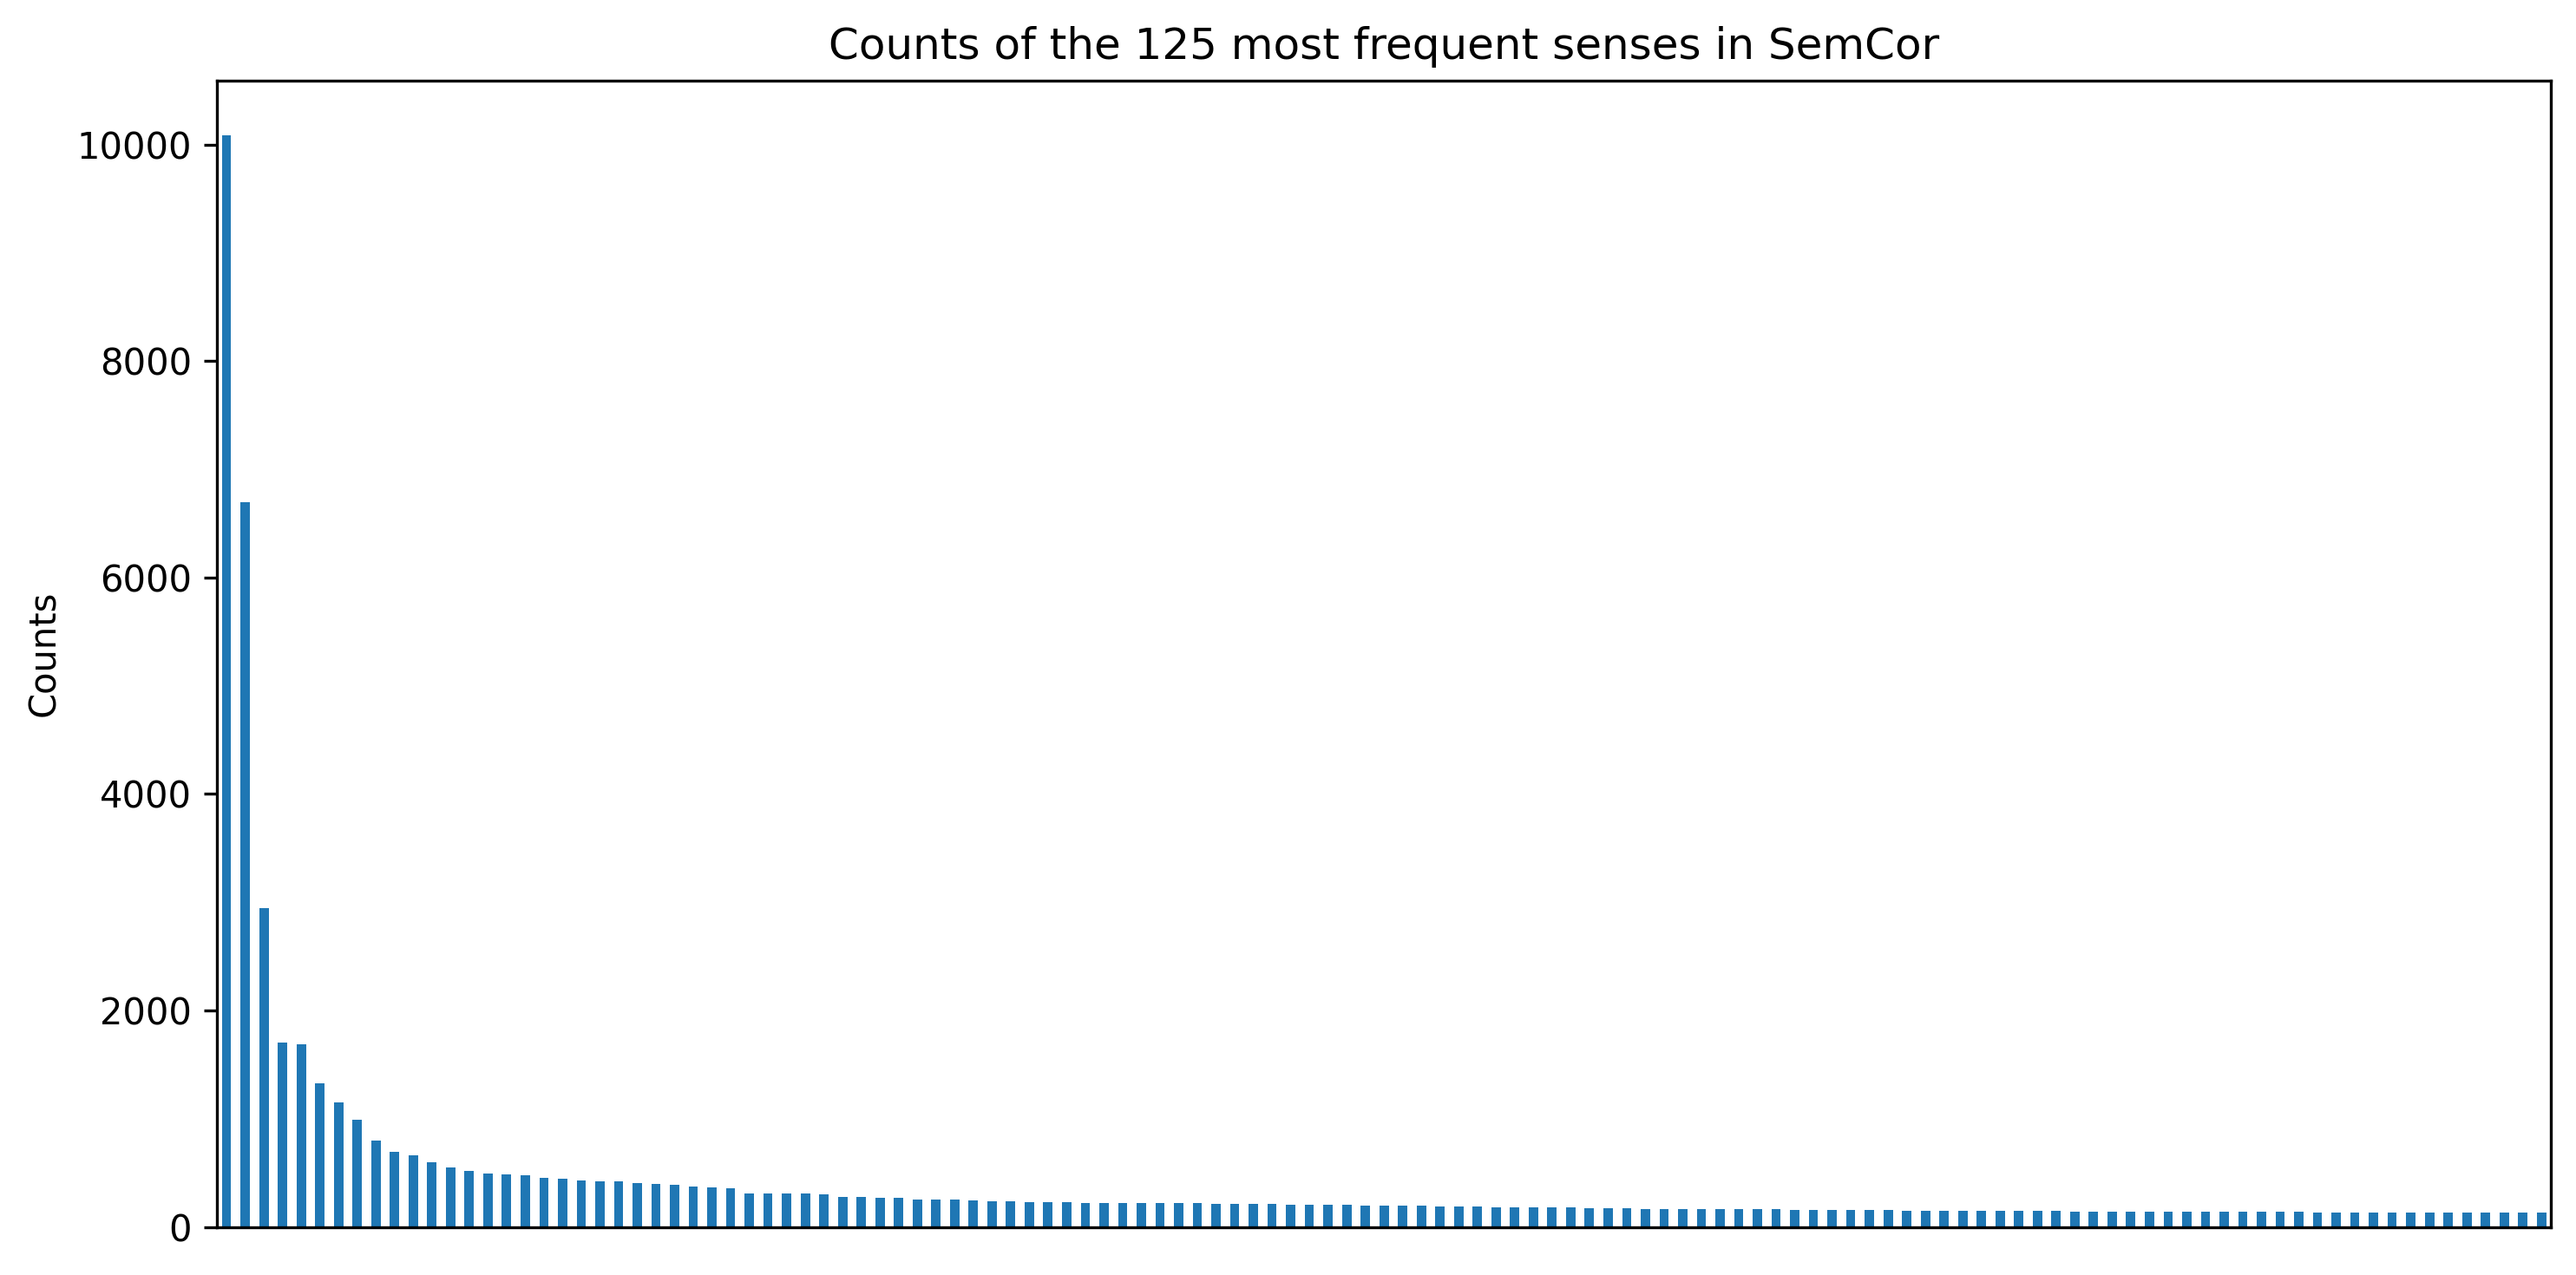

In [46]:
N = 125

f, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=300)
counts_df.sort_values("count", ascending=False)[:N].plot.bar(ax=ax, legend=False)
ax.set_xticklabels([])
ax.set_xticks([])
ax.set_ylabel("Counts")
ax.set_title(f"Counts of the {N} most frequent senses in SemCor")
f.set_tight_layout(True)
plt.show()

The plot is very zipfian. Perhaps an [adaptive softmax](https://pytorch.org/docs/stable/generated/torch.nn.AdaptiveLogSoftmaxWithLoss.html) is more appropriate.